### Practice-Linna
#### 1. Portfolio allocation
#### 2. CAPM 

In [22]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as ssn
ssn.set()

In [3]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2020-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
googl = quandl.get('WIKI/GOOGL.11',start_date=start,end_date=end)
msft = quandl.get('WIKI/MSFT.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [5]:
stocks=pd.concat([aapl,googl,msft,amzn],axis=1)
stocks.head()

,Adj. Close,Adj. Close,Adj. Close,Adj. Close
Date,,,,
2015-01-02,103.863957,529.55,43.344312,308.52
2015-01-05,100.937944,519.46,42.941088,302.19
2015-01-06,100.947444,506.64,42.315395,295.29
2015-01-07,102.362951,505.15,42.853027,298.42
2015-01-08,106.295968,506.91,44.113683,300.46


In [9]:
stocks.columns=['AAPL','GOOGL','MSFT','AMZN']

In [17]:
mean_daily_return=stocks.pct_change(1).mean()
mean_daily_return

AAPL     0.000702
GOOGL    0.000894
MSFT     0.001000
AMZN     0.002107
dtype: float64

In [13]:
stocks.pct_change(1).corr()

,AAPL,GOOGL,MSFT,AMZN
AAPL,1.000000,0.455996,0.526655,0.396678
GOOGL,0.455996,1.000000,0.606308,0.597007
MSFT,0.526655,0.606308,1.000000,0.539636
AMZN,0.396678,0.597007,0.539636,1.000000


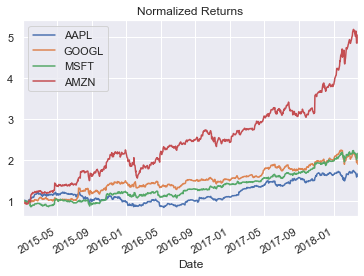

In [16]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()
plt.title('Normalized Returns');

In [19]:
stocks_daily_return=stocks.pct_change(1)
stocks_daily_return.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.019054,-0.009303,-0.020517
2015-01-06,0.000094,-0.024679,-0.014571,-0.022833
2015-01-07,0.014022,-0.002941,0.012705,0.010600
2015-01-08,0.038422,0.003484,0.029418,0.006836


* Log return

In [24]:
log_return=np.log(stocks/stocks.shift(1))
log_return.head()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.019238,-0.009346,-0.020731
2015-01-06,0.000094,-0.024989,-0.014678,-0.023098
2015-01-07,0.013925,-0.002945,0.012625,0.010544
2015-01-08,0.037703,0.003478,0.028994,0.006813


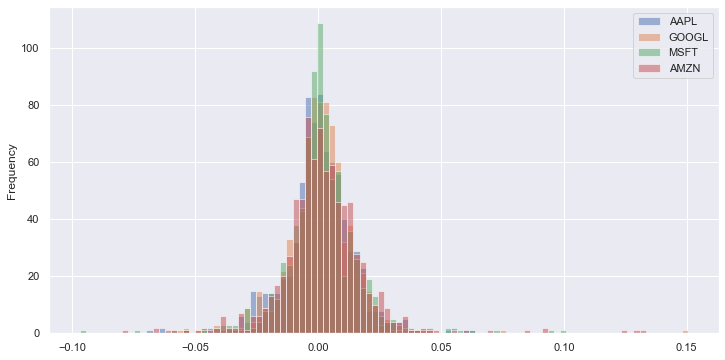

In [26]:
log_return.plot(kind='hist',bins=100,alpha=0.5,figsize=(12,6))

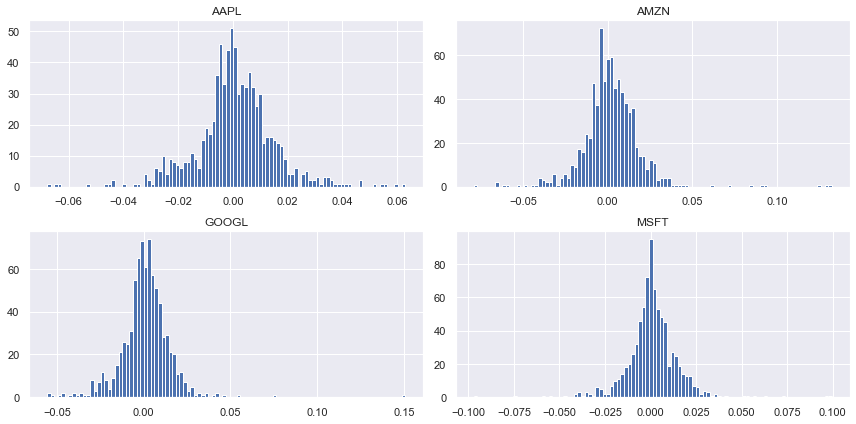

In [27]:
log_return.hist(bins=100,figsize=(12,6))
plt.tight_layout();

In [29]:
log_return.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,810.0,0.000567,0.014606,-0.067965,-0.005870,0.000396,0.008031,0.062940
GOOGL,812.0,0.000791,0.014272,-0.055662,-0.005391,0.001262,0.007715,0.150645
MSFT,812.0,0.000893,0.014640,-0.097099,-0.005186,0.000492,0.007262,0.099413
AMZN,810.0,0.001947,0.017809,-0.079151,-0.006469,0.001302,0.010276,0.132178


In [30]:
#mean annual log return
log_return.mean()*252

AAPL     0.142981
GOOGL    0.199441
MSFT     0.224916
AMZN     0.490678
dtype: float64

In [31]:
# Compute pairwise covariance of columns
log_return.cov()

,AAPL,GOOGL,MSFT,AMZN
AAPL,0.000213,0.000097,0.000113,0.000105
GOOGL,0.000097,0.000204,0.000128,0.000154
MSFT,0.000113,0.000128,0.000214,0.000141
AMZN,0.000105,0.000154,0.000141,0.000317


## Single Run for Random Allocation

In [35]:
np.random.seed(101)
print(stocks.columns)

weights=np.array(np.random.random(4))
print('Random Weights:')
print(weights)

print('Rebalanced Weights:')
weights=weights/np.sum(weights)
print(weights)

#Expected Returns
print('Expected Portfolio Retrun:')
exp_return=np.sum(log_return.mean()*weights*252)
print(exp_return)

#Expected Volitility
exp_vol=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
print(exp_vol)

#Sharpe ratio
print('Sharpe Ratio:')
SR=exp_return/exp_vol
print(SR)

Index(['AAPL', 'GOOGL', 'MSFT', 'AMZN'], dtype='object')
Random Weights:
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalanced Weights:
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Retrun:
0.21616376616573166
0.1939745231189352
Sharpe Ratio:
1.1143925639821841


In [78]:
np.random.seed(1001)

#number of possible positions/portfolios
num_ports=8000
all_weights=np.zeros((num_ports,len(stocks.columns)))
ret_array=np.zeros(num_ports)
vol_array=np.zeros(num_ports)
sharpe_array=np.zeros(num_ports)

for ind in range(num_ports):
    
    #weights
    weights=np.array(np.random.random(4))
    weights=weights/np.sum(weights)
    
    #save weights
    all_weights[ind,:]=weights
    
    #Expected Returns
    ret_array[ind]=np.sum(log_return.mean()*weights*252)
    
    #Expected Volitility
    vol_array[ind]=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    
    #Sharpe ratio
    sharpe_array[ind]=ret_array[ind]/vol_array[ind]


In [80]:
sharpe_array.max()

1.7291289575831996

In [83]:
#locate the best sharpe ratio
sharpe_array.argmax()

1624

In [84]:
all_weights[sharpe_array.argmax()]

array([0.04745169, 0.01126013, 0.01680963, 0.92447855])

In [85]:
max_sr_return=ret_array[sharpe_array.argmax()]
max_sr_vol=vol_array[sharpe_array.argmax()]
print(max_sr_return)
print(max_sr_vol)

0.4664324806160926
0.2697499677918901


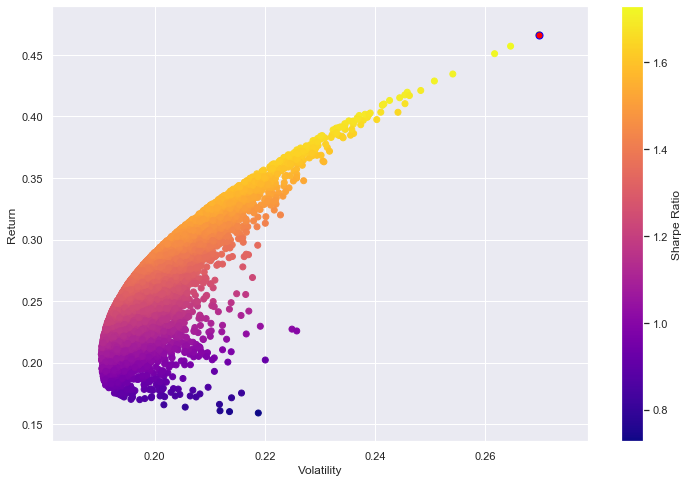

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array,ret_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

#also locate the best sharpe ratio on the plot
plt.scatter(max_sr_vol,max_sr_return,c='red',s=50,edgecolor='blue')

In [87]:
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    exp_return = np.sum(log_return.mean()*weights)*252
    exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    SR=exp_return/exp_vol
    return np.array([exp_return,exp_vol,SR])

In [92]:
from scipy.optimize import minimize

In [90]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [91]:
def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [93]:
cons=({'type':'eq','fun':check_sum})

In [94]:
bounds=((0,1),(0,1),(0,1),(0,1))

In [95]:
init_guess=[0.25,0.25,0.25,0.25]

In [97]:
opt_results=minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [98]:
opt_results

     fun: -1.7360018017259429
     jac: array([ 8.08711499e-02,  1.51172131e-01,  8.20398331e-04, -2.64048576e-05])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([6.93889390e-18, 0.00000000e+00, 3.11859649e-02, 9.68814035e-01])

In [99]:
opt_results.x

array([6.93889390e-18, 0.00000000e+00, 3.11859649e-02, 9.68814035e-01])

In [100]:
get_ret_vol_sr(opt_results.x)

array([0.48238995, 0.27787411, 1.7360018 ])

In [101]:
frontier_y=np.linspace(0,0.5,100)

In [102]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [106]:
frontier_volatility=[]
for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

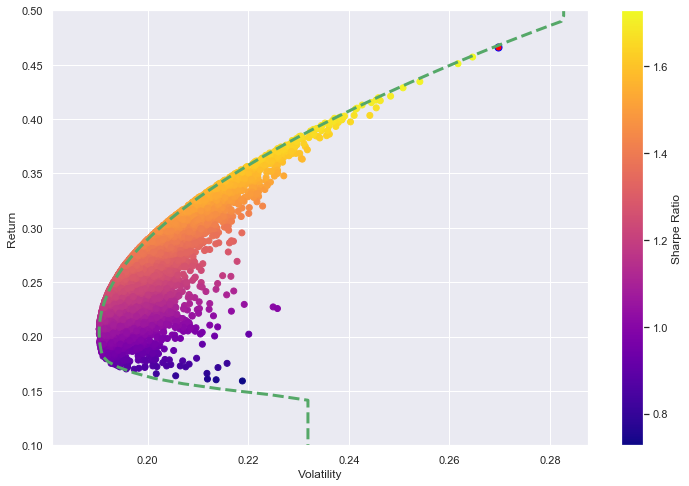

In [111]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array,ret_array,c=sharpe_array,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

#also locate the best sharpe ratio on the plot
plt.scatter(max_sr_vol,max_sr_return,c='red',s=50,edgecolor='blue')
plt.ylim(0.1,0.5)

plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

## CAPM model

In [112]:
from scipy import stats

In [117]:
import pandas_datareader as web

In [132]:
start=pd.to_datetime('2010-01-04')

In [133]:
end=pd.to_datetime('2017-07-25')

In [130]:
spy_etf=web.DataReader('SPY','yahoo',start,end)

In [131]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.803726


In [123]:
aapl=web.DataReader('AAPL','yahoo',start,end)

In [124]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753


In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

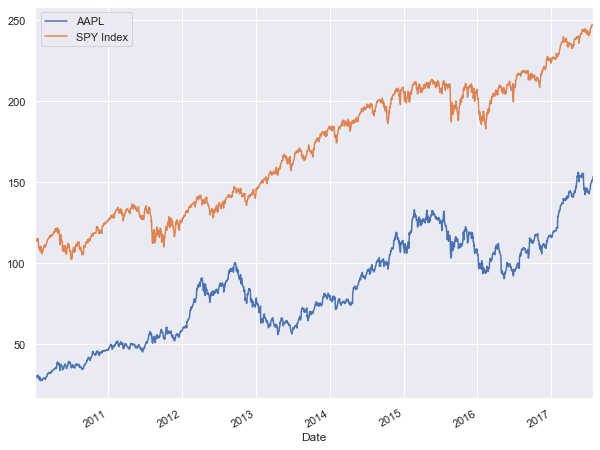

In [134]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

Compare cumulative returns

In [136]:
aapl['Cumulative']=aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative']=spy_etf['Close']/spy_etf['Close'].iloc[0]

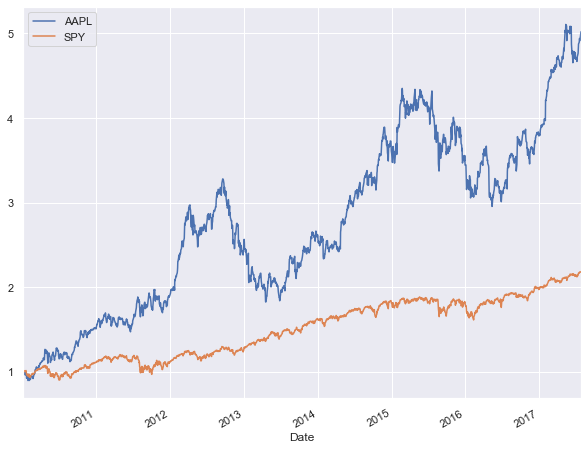

In [137]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

compare daily returns

In [153]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

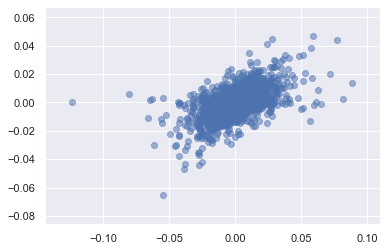

In [154]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.5)

In [155]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [156]:
beta

0.3256324361221894

In [157]:
alpha

0.00013659446135346322

In [143]:
r_value

0.5555780190694828

In [158]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [145]:
import numpy as np

In [169]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [170]:
noise

array([ 0.00075386,  0.00010512,  0.00113536, ..., -0.00106976,
        0.00171787, -0.00039299])

In [173]:
fake_stock=spy_etf['Daily Return'].iloc[1:]+noise

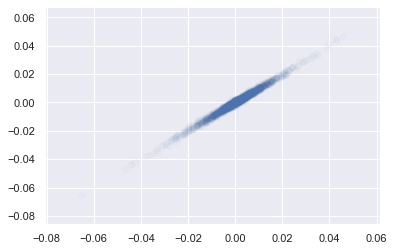

In [174]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.025)

* The plot above shows a obvious linear relationship

In [175]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [176]:
beta

0.9864593428548232

In [177]:
alpha

5.376879465021818e-05